# AMS 561 Homework 3: Track B

This homework uses packages `numpy`, `scipy.linalg`, and `matplotlib.pyplot`.

In [1]:
from math import *

import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## Problem 1

Numerical differentiation (estimating the slope of a function) is an important task for many scientific disciplines.  We will examine two numerical differentiation methods to explore the interplay of algorithmic errors expected in exact arithmetic and the errors that arise in floating-point arithmetic (cancellation and rounding). 

The first approach is called the *forward difference* --- we take a small step ($h$) in the forward direction and estimate the derivative (slope of the curve) as the following ratio
$$
  \frac{df}{dx} \approx \frac{f(x+h) - f(x)}{h} 
$$

The error (in exact arithmetic) in this estimate is $\epsilon_f = O(h)$ which means that $\epsilon_f(h) \le c_f h$ as $h\rightarrow 0$ for some constant $c_f$.

The second approach is called the *central difference*
$$
  \frac{df}{dx} \approx \frac{f(x+h) - f(x-h)}{2h} 
$$

The error (in exact arithmetic) in this estimate is $\epsilon_c = O(h^2)$ which means that $\epsilon_c(h) \le c_c h^2$ as $h\rightarrow 0$ for some constant $c_c$.

You can see two things:
1. As we make $h$ smaller, both of these errors become smaller.
2. For small $h$, the central-difference method should be more accurate since $h^2 < h$ for $h<1$ (e.g., $0.01^2=0.0001$).

**In this problem we are exploring the following two issues**
* How accurately can we estimate the derivative using the above formulas in floating point arithmetic?
* What is the step size $h$ that gives us the best accuracy for each rule?

The following figure illustrates for the function $f(x) = 10x^3-x$ use of the above two formulas to estimate the derivative at $x=0.1775$ using the step size $h=0.005$. 


exact   : -0.05481250000000004
forward : -0.027937499999999837
central : -0.05456250000000079


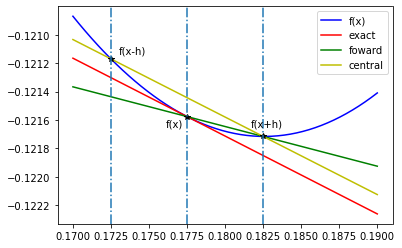

In [2]:
def f(x):
    return 10*x**3 - x

def dfdx(x):
    return 30*x**2 - 1

xplot = np.linspace(0.17,0.19,50)
x = 0.1775#0.18
h = 0.005

dfdx_exact = dfdx(x)
dfdx_forward = (f(x+h)-f(x))/h
dfdx_central = (f(x+h)-f(x-h))/(2*h)
print("exact   :", dfdx_exact)
print("forward :", dfdx_forward)
print("central :", dfdx_central)


curve = f(xplot)
line1 = f(x) + (xplot-x)*dfdx_exact
line2 = f(x) + (xplot-x)*dfdx_forward
line3 = f(x-h) + (xplot-x+h)*dfdx_central

plt.plot(xplot,curve,'-b',label='f(x)')
plt.plot(xplot,line1,"r",label='exact')
plt.plot(xplot,line2,"g",label='foward')
plt.plot(xplot,line3,"y",label='central')
plt.plot([x-h,x,x+h],[f(x-h),f(x),f(x+h)],"*k")
plt.axvline(x, linestyle="-.")
plt.axvline(x+h, linestyle="-.")
plt.axvline(x-h, linestyle="-.")
plt.annotate('f(x)',xy=(x-0.0014,f(x)-0.00007))
plt.annotate('f(x+h)',xy=(x+h-0.0008,f(x+h)+0.00007))
plt.annotate('f(x-h)',xy=(x-h+0.0005,f(x-h)+0.00004))

plt.legend(loc="upper right");

**Q1a:** In the following, we use floating-point arithmetic to represent the values `x=3.09` and `y=2.1` and compute `x-y` that should be equal to `0.99`.

Evaluate the absolute and relative error in the result and explain the sources of these errors.

In [16]:
x = 3.09
y = 2.1
result = x-y
print("%.17f - %.17f = %.17f" % (x, y, result))

print('absoluate error:', abs(result-0.99))
print('relative error:', abs(result-0.99)/0.99)

3.08999999999999986 - 2.10000000000000009 = 0.98999999999999977
absoluate error: 2.220446049250313e-16
relative error: 2.2428747972225386e-16


**Q1b**: Represent the numbers `x` and `y` and compute `x-y` in Q1a using `numpy.float32` and compare the magnitudes of the errors with those from Q1a. Explain these magnitudes using the concept that we covered in class.

In [17]:
result = np.float32(result)
print('absoluate error:', abs(result-0.99))
print('relative error:', abs(result-0.99)/0.99)

absoluate error: 9.536743172944284e-09
relative error: 9.633073912064934e-09


**Q1c:** In the following, we perform the calculation $(x-y)/h$ where $h$ is a small number (with $h=1e-5$ the exact answer should be 99000).

Explain your observed absolute error (comparing it to Q1a).

In [19]:
x = 3.09
y = 2.1
h = 1e-5
result = (x-y)/h
print("%.17f - %.17f = %.17f" % (x, y, result))
print('absoluate error:', abs(result-99000))

3.08999999999999986 - 2.10000000000000009 = 98999.99999999997089617
absoluate error: 2.9103830456733704e-11


Coming back to the computation of the derivative you can see that we will have 2 sources of error
1. The algorithmic error that was given above --- $\epsilon_f(h) \le c_f h$ or $\epsilon_c(h) \le c_c h^2 $
   * As we make $h$ smaller this error get *smaller*
1. The floating-point error that we can estimate as $\epsilon_{float} \le c_{float} \epsilon_{mach}/h$ (where $c_{float}$ is another constant).
   * As we make $h$ smaller this error gets *bigger*

Thus, we *cannot* compute the derivative to any accuracy we want just by making the step ($h$) smaller and smaller --- at some point the floating-point error will dominate.

The lowest error we can get is when the two errors (algorithmic and floating point) are equal.  We can use this equality to define the optimal value for the step (for simplicity, in the following I set all of the constants $c_f$, $c_c$, and $c_{float}$ to the value 1 --- the actual values can be estimated but those details are not relevant here, and for the test problem below the constants are all $O(1)$)
$$
  \mathrm{Forward:}\ \ \ \ \  \frac{\epsilon_{mach}}{h_{opt}} = h_{opt} \ \ \implies \ \ h_{opt} = O(\epsilon_{mach}^{1/2}) \\
  \mathrm{Central:}\ \ \ \ \  \frac{\epsilon_{mach}}{h_{opt}} = h_{opt}^2 \ \ \implies \ \ h_{opt} = O(\epsilon_{mach}^{1/3})
$$


In the test problem below you will examine the error in the numerical derivative of $\cos x$ evaluated at $x=0.15$ using step sizes $h=2^{-n}, \ \ n=0,1,\ldots,50$.  The exact derivative is $-\sin x$.

\[Aside: it's useful to remember that $2^{10} \approx 1000$ so $2^{-50}\approx10^{-15}$.\]


In [ ]:
def f(x):
    return np.cos(x)

def dfdx(x):
    return -np.sin(x)

x = 0.15
h = 0.5**np.linspace(0,50,51)
dfdx_exact = dfdx(x)

**Q1d:** Using the values of $h$ given above.  Make a single plot using log scale for both axes with $h$ on the horizontal axis with
* the absolute value of the error in the forward-difference approximation,
* the absolute value of the error in the central-difference approximation, and
* please display a legend, label the axes, and provide a title.

**Q1e:** Compare the observed optimal (i.e., lowest error) values of the step size ($h_{opt}$) with the formulas provided above (i.e., evaluate the above formulas for $h_{opt}$).  Do they agree?

## Problem 2

Gaussian elimination transforms a general nonsingular matrix into lower and upper triangular matrices. The following is a Python function `forward` for solving a linear system $Lx=b$, where $L$ is lower triangular, i.e., 
$$
L=\left[\begin{array}{cccc}
\ell_{11} & 0 & \cdots & 0\\
\ell_{21} & \ell_{22} & \ddots & \vdots\\
\vdots & \vdots & \ddots & 0\\
\ell_{n1} & \ell_{n2} & \cdots & \ell_{nn}
\end{array}\right].
$$

The matrix is said to be *unit lower triangular* all the diagonal entries are all 1.

In [ ]:
def forward(L, b):
    '''
    L is a numpy lower triangular square matrix
    b is a numpy vector
    
    return x the solution of L x = b
    '''

    n, m = L.shape
    if n != m: 
        raise ValueError # must be square
    if n != b.shape[0]:
        raise ValueError # matrix and vector must be same size
    
    x = np.copy(b)
    for i in range(n):
        for j in range(i):
            x[i] = x[i] - L[i,j]*x[j]
        x[i] = x[i]/L[i,i]

    return x

**Q2a**: Verify the correctness of the above function by generating some random lower-triangular matrices $L$, solving $Lx=b$ against the vector $b$ composed of all ones, and checking the residual $b-Lx$.

**Q2b**: Rewrite the function to vectorize the inner loop using the `dot` function, instead of using an explicit loop on $j$. Verify your implementation using the same strategy as for part Q2a.

In [ ]:
def forward_vectorized(L,b):
    '''
    L is a numpy lower triangular square matrix
    b is a numpy vector
    
    return x the solution of L x = b
    '''


**Q2c**: Construct some random **unit** lower-triangular matrices of sizes of $n=2^5,2^6,\cdots,2^{12}$ and then measure the runtimes of 
solving them using your `forward_vectorized` function. Plot the runtimes against $n$ in logarithmic scale. 

**Q2d**: Use the `forward_vectorized` function to compute $L^{-1}$ by letting the right-hand side vector $b$ to be the $n\times n$ identity matrix $I$. Measure the runtimes for $n=2^5,2^6,\cdots,2^{12}$ and plot the runtimes against $n$ in logarithmic scale.

**Q2e**: Explain the differences in runtimes in (c) and (d) by analyzing their respective numbers of floating-point operations using the big-$\mathcal{O}$ notation.

**Answer**: [Type your answer here.]

## Problem 3


We explore the connection between matrix condition number and the stability of polynomial fits to data by (1) changing the polynomial order, and (2) changing the number of sample points.

Given a set of $m$ data points $\{t_i, f_i\}$, we can construct a degree-$(n-1)$ polynomial to fit the data points by solving an $m\times n$ linear system or a least-squares problem

$$
\boldsymbol{A}\boldsymbol{x} = 
\left[\begin{array}{cccc}
1 & t_1 & \cdots & t_1^{n-1} \\
1 & t_2 & \cdots & t_2^{n-1} \\
\vdots & \vdots & \ddots & \vdots\\
1 & t_m & \cdots & t_m^{n-1}
\end{array}\right]
\left[\begin{array}{c}
c_0 \\
c_1 \\
\vdots\\
c_{n-1}
\end{array}\right]
\approx 
\left[\begin{array}{c}
f_1 \\
f_2 \\
\vdots\\
f_m
\end{array}\right]
=
\boldsymbol{b}.
$$

The matrix $\boldsymbol{A}$ above is known as the *Vandermonde matrix*.

We will test it using $f(t) = 1/(1+25 t^2)$ on the range $[-1,1]$ (this is known as Runge's function).

**Q3a:** Write a Python function to return both an $m$-vector (`t`) containing $m$ equally spaced points $t_i$ over the interval $[-1, 1]$, including the end-nodes, and an $m$-vector ($b$) containing components $b_i=f(t_i)$ (i.e., your function should return the tuple `(t,b)`).  You may use `numpy.linspace` but you must **not use any Python loops** (i.e., your function should be properly vectorized --- refer to the B01 lecture notes).


**Q3b:** Write a function (that takes `m, n, t` as arguments) to generate the Vandermonde matrix for $m$ input points (in the vector `t`) for a degree-$(n-1)$ polynomial. Do **not** use the built-in `scipy.vander` function (since the goal is to practice some `numpy`).

**Q3c:** Use the `numpy.linalg.cond` function to compute the condition numbers of the Vandermonde matrix in $2$-norm for $n=2, 3, \cdots, 20$. Plot in two separate curves the condition numbers as a function of $n$ with (1) $m=n$, and (2) $m=2n$ .

**Q3d:** Construct polynomial interpolations for $n=5, 10, 15, 30$ and $m=n$ by solving their corresponding linear systems using `scipy.linalg.solve`. I.e.,
1. Make the vector of $m$ points $t_i$ and the right-hand-side vector $b_i = f(t_i)$ using the function that you wrote in Q3a.
2. Make the $m\times n$ Vandermonde matrix using the function you wrote in Q3b.
3. Solve the linear equation $Ac=b$ for the vector $c$ of polynomial coefficients.

Plot each of the four polynomials and Runge's function (make a figure with 4 sub-plots stacked vertically, each containing the plot of one polynomial and Runge's function, and annotated with the value of $n$). Comment on the general trend of the condition numbers from Q3c above versus the reliability of the fittings.

**Q3e:** Copy your code from Q3d and modify it to add a small amount of random noise to the right-hand side using

```
    b += np.random.random(m)*1e-2
```

Did you observe that (especially for $n=30$) this small noise made a huge difference in the polynomial fit?  **Explain why.**

**Q3f:** Solve the same problem as in Q3d but let $m=2n$ and construct a least squares fit by solving the least squares problem using `scipy.linalg.lstsq`. Also (referring to the condition numbers you computed above) explain why this is superior.

**Q3g:** Just as you did previously, copy your solution to the least squares problem above (Q3f) and modify it to introduce some noise

```
    b += np.random.random(m)*1e-2
```

How sensitive is the least squares fit to this noise?  **Explain why.**